MUQING WEN, ZHOUYI QIAN
Spring 2023
CS 443: Bio-inspired Machine Learning
Week 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
# import tensorflow as tf

import preprocess
import word2vec
import imdb
import som

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 18})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

OSError: 'seaborn-v0_8-colorblind' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

### 1. Test Skipgram on a small amount of training dataset

load the email data set into dataset we can use

In [2]:
FOLDER_PATH = 'data/enron/spam'
num_emails = 20
targets_int, contexts_int, unique_words, word2ind = preprocess.get_dataset(FOLDER_PATH, num_emails)

Use Skip-gram to create word embeddings for the email dataset

In [3]:
vocab_sz = len(unique_words)
M = vocab_sz
H = 20
C = vocab_sz
batch_sz = 11

net = word2vec.Skipgram(M, H, C, wt_stdev=0.1)

dev_targets_int = targets_int[0:10]
dev_contexts_int = contexts_int[0:10]
hist_1 = net.fit(dev_targets_int, dev_contexts_int, mini_batch_sz=batch_sz, lr=1e-2, n_epochs=400, print_every=50, verbose=True)

Metal device set to: Apple M1 Pro
Starting to train network ....
Epoch 0/400, Training Loss: 19.16%.


2023-04-13 13:36:16.874031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-13 13:36:16.874215: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 50/400, Training Loss: 5.00%.
Epoch 100/400, Training Loss: 3.82%.
Epoch 150/400, Training Loss: 3.67%.
Epoch 200/400, Training Loss: 3.65%.
Epoch 250/400, Training Loss: 3.64%.
Epoch 300/400, Training Loss: 3.63%.
Epoch 350/400, Training Loss: 3.63%.


plot the training loss on the dev dataset

In [12]:
def plot_train_loss(train_loss, title="Training Loss for Skip-gram", n_samps=None, batch_sz=None):
    x_train = []

    for i in range(len(train_loss)):
        i_epoch = int(i/ (n_samps / batch_sz))
        x_train.append(i_epoch)

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))

    axes.plot(x_train, train_loss, ".g-", markersize=5, label="Train Loss")

    # Axes.set_xlabel(xlabel)
    axes.set_xlabel("Training Epochs")
    axes.set_ylabel("Loss")

    # axes.set_xticks(x_list)
    axes.set_xticklabels(axes.get_xticks(), rotation=0)

    # frameon: Whether the legend should be drawn on a patch (frame).
    axes.legend(loc="lower left", bbox_to_anchor=(1, 0), frameon=True, edgecolor="black")

    axes.set_title(title)
    plt.show()

/var/folders/w9/cc58q4sx1_x2xvcygb70jn2w0000gp/T/ipykernel_2988/2205290549.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticks(), rotation=0)


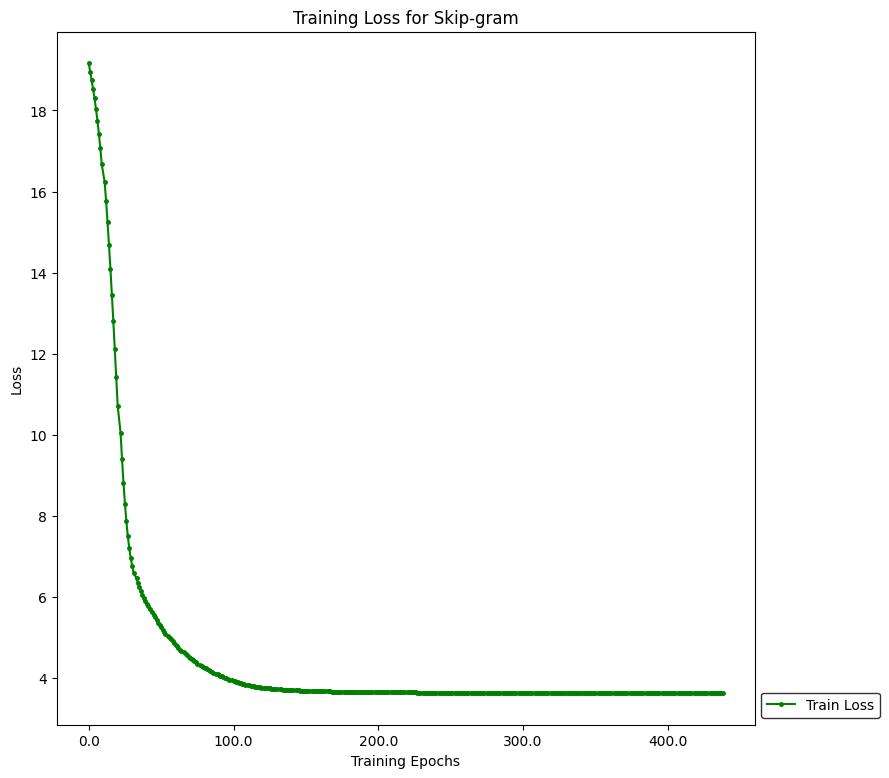

In [5]:
plot_train_loss(hist_1, n_samps=dev_targets_int.shape[0], batch_sz=batch_sz)

### 2. Start to train on a large number of dataset
#### a. Build the training and testing dataset

get a large dataset to train the skipgram

In [6]:
SPAM_FOLDER_PATH = 'data/enron/spam'
num_emails = 200
spam_targets_int, spam_contexts_int, spam_unique_words, spam_word2ind = preprocess.get_dataset(path2folder1=SPAM_FOLDER_PATH, num_emails=num_emails)

HAM_FOLDER_PATH = 'data/enron/ham'
ham_targets_int, ham_contexts_int, ham_unique_words, ham_word2ind = preprocess.get_dataset(path2folder1=HAM_FOLDER_PATH, num_emails=num_emails)

targets_int, contexts_int, unique_words, word2ind = preprocess.get_dataset(path2folder1=SPAM_FOLDER_PATH, path2folder2=HAM_FOLDER_PATH, num_emails=num_emails)

6770


get list of corpus for testing purpose

In [ ]:
email_indices_to_extract = list(range(num_emails*0.8,num_emails))

spam_test_corpus_list = []
ham_test_corpus_list = []
for index in email_indices_to_extract:
    # extract single one email at a time from the spam and the ham
    email_dat = preprocess.extract_sentences_from_path('data/enron/spam', [index])
    corpus = imdb.make_corpus(email_dat)
    spam_test_corpus_list.append(corpus)

    email_dat = preprocess.extract_sentences_from_path('data/enron/ham', [index])
    corpus = imdb.make_corpus(email_dat)
    ham_test_corpus_list.append(corpus)

train the skipgram on the words from both the spam and the ham class

In [7]:
print(len(targets_int))

33971


In [11]:
vocab_sz = len(unique_words)
M = vocab_sz
H = 200
C = vocab_sz
batch_sz = 2000

net = word2vec.Skipgram(M, H, C, wt_stdev=0.1)

hist_1 = net.fit(targets_int, contexts_int, mini_batch_sz=batch_sz, lr=1e-2, n_epochs=400, print_every=10, verbose=True)

Starting to train network ....
Epoch 0/400, Training Loss: 30.24.
Epoch 10/400, Training Loss: 14.94.
Epoch 20/400, Training Loss: 14.36.
Epoch 30/400, Training Loss: 14.17.
Epoch 40/400, Training Loss: 14.53.
Epoch 50/400, Training Loss: 14.46.
Epoch 60/400, Training Loss: 14.33.
Epoch 70/400, Training Loss: 14.04.
Epoch 80/400, Training Loss: 14.38.
Epoch 90/400, Training Loss: 14.43.
Epoch 100/400, Training Loss: 14.43.
Epoch 110/400, Training Loss: 14.08.
Epoch 120/400, Training Loss: 14.39.
Epoch 130/400, Training Loss: 14.47.
Epoch 140/400, Training Loss: 14.15.
Epoch 150/400, Training Loss: 14.27.
Epoch 160/400, Training Loss: 14.60.
Epoch 170/400, Training Loss: 14.32.
Epoch 180/400, Training Loss: 14.23.
Epoch 190/400, Training Loss: 14.20.
Epoch 200/400, Training Loss: 14.21.
Epoch 210/400, Training Loss: 14.14.
Epoch 220/400, Training Loss: 14.46.
Epoch 230/400, Training Loss: 14.32.
Epoch 240/400, Training Loss: 14.21.
Epoch 250/400, Training Loss: 14.27.
Epoch 260/400, Tra

/var/folders/w9/cc58q4sx1_x2xvcygb70jn2w0000gp/T/ipykernel_1729/2205290549.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticks(), rotation=0)


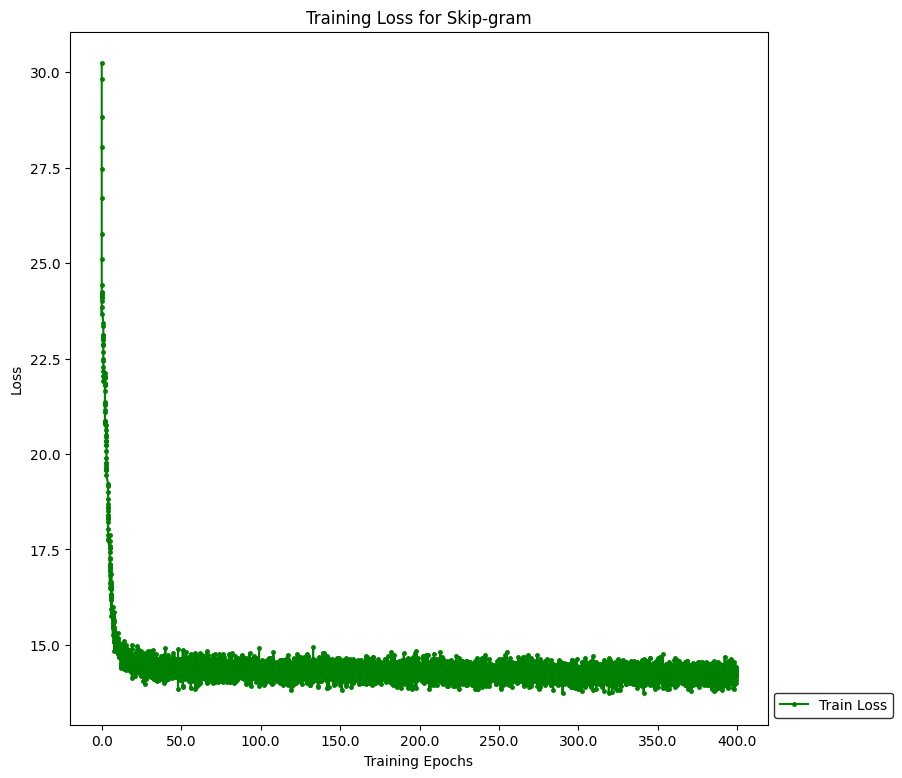

In [13]:
plot_train_loss(hist_1, n_samps=targets_int.shape[0], batch_sz=batch_sz)

b. build training dataset for MLP network